<a href="https://colab.research.google.com/github/TruongQuocHau110802/AI_project/blob/main/train_musical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Du lieu/Musican

/content/drive/MyDrive/Colab Notebooks/Du lieu/Musican


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Du lieu/Musican/database/Training',target_size=(300,300), batch_size=32, class_mode='categorical')
     

Found 500 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Du lieu/Musican/database/Validation',target_size=(300,300), batch_size=32, class_mode='categorical')
     

Found 300 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
dict = training_set.class_indices
dict

{'Sáo trúc': 0,
 'Song loan': 1,
 "Đàn T'rưng": 2,
 'Đàn bầu': 3,
 'Đàn cò': 4,
 'Đàn nguyệt': 5,
 'Đàn sến': 6,
 'Đàn tranh': 7,
 'Đàn tỳ bà': 8,
 'Đàn đáy': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Sáo trúc': 0,
 'Song loan': 1,
 "Đàn T'rưng": 2,
 'Đàn bầu': 3,
 'Đàn cò': 4,
 'Đàn nguyệt': 5,
 'Đàn sến': 6,
 'Đàn tranh': 7,
 'Đàn tỳ bà': 8,
 'Đàn đáy': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])
     

Epoch 1/100
16/16 [==============================] - 271s 17s/step - loss: 11.8880 - accuracy: 0.1200 - val_loss: 2.2876 - val_accuracy: 0.1633
Epoch 2/100
16/16 [==============================] - 20s 1s/step - loss: 2.2634 - accuracy: 0.1880 - val_loss: 2.1132 - val_accuracy: 0.2300
Epoch 3/100
16/16 [==============================] - 20s 1s/step - loss: 2.1038 - accuracy: 0.2820 - val_loss: 1.7635 - val_accuracy: 0.4467
Epoch 4/100
16/16 [==============================] - 20s 1s/step - loss: 1.7296 - accuracy: 0.3960 - val_loss: 1.4495 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 22s 1s/step - loss: 1.4231 - accuracy: 0.5060 - val_loss: 1.2908 - val_accuracy: 0.5867
Epoch 6/100
16/16 [==============================] - 20s 1s/step - loss: 1.2279 - accuracy: 0.6380 - val_loss: 1.0196 - val_accuracy: 0.6633
Epoch 7/100
16/16 [==============================] - 20s 1s/step - loss: 1.0629 - accuracy: 0.6540 - val_loss: 0.8535 - val_accuracy: 0.7200
Epoch 8/10

In [ ]:
# Lưu lại
model.save("musical.h5")

In [ ]:
file = '/content/drive/MyDrive/Colab Notebooks/Du lieu/Musican/musical.h5'
# Tải mô hình 
model_CNN=load_model(file)

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0091389250010252
Train Accuracy 0.9980000257492065


<function matplotlib.pyplot.show(*args, **kw)>

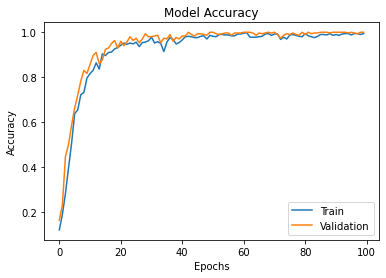

In [ ]:

# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=300x300 at 0x7F8A5A431B80>
1/1 [==============================] - 7s 7s/step
Day la: Dan tranh


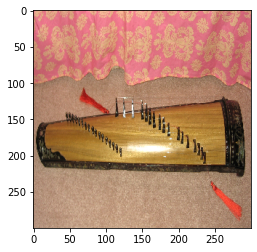

<PIL.Image.Image image mode=RGB size=300x300 at 0x7F8A560DD0D0>
1/1 [==============================] - 0s 20ms/step
Day la: Sao truc


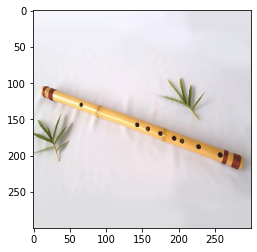

<PIL.Image.Image image mode=RGB size=300x300 at 0x7F898C3604F0>
1/1 [==============================] - 0s 17ms/step
Day la: Dan nguyet


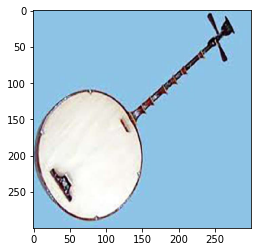

<PIL.Image.Image image mode=RGB size=300x300 at 0x7F89754DC4C0>
1/1 [==============================] - 0s 15ms/step
Day la: Da T'rung


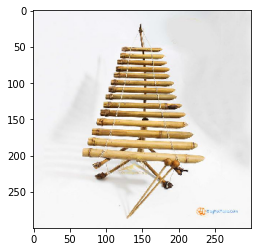

<PIL.Image.Image image mode=RGB size=300x300 at 0x7F8A593C0F40>
1/1 [==============================] - 0s 19ms/step
Day la: Dan day


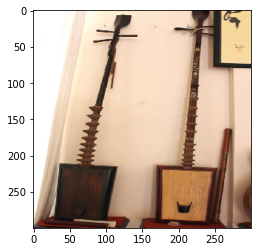

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/Du lieu/Musican/database/Test/Test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  print(img)
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Sao truc'
  if round(result[0][1])==1:
    prediction='Song loan'
  if round(result[0][2])==1:
    prediction="Da T'rung"
  if round(result[0][3])==1:
    prediction='Dan bau'
  if round(result[0][4])==1:
    prediction='Dan co'
  if round(result[0][5])==1:
    prediction='Dan nguyet'
  if round(result[0][6])==1:
    prediction='Dan sen'
  if round(result[0][7])==1:
    prediction='Dan tranh'
  if round(result[0][8])==1:
    prediction='Dan ti ba'
  if round(result[0][9])==1:
    prediction='Dan day'
  print('Day la:',prediction)
  plt.show()